In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
df = pd.read_excel('WorkPlaceSatisfactionSurveyData.xlsx')

## Family situation table and drawing diagram

In [17]:
df_family=pd.crosstab(df['family'], 'Count')
df_family.index=['Single', 'Not single']
df_family['%'] = df_family['Count'] / df_family['Count'].sum() * 100
df_family.columns.name=''
df_family.loc['Total'] = df_family[['Count', '%']].sum()
df_family['Count'] = df_family['Count'].astype(int)
df_family.round(decimals=1)

,Count,%
Single,31,37.8
Not single,51,62.2
Total,82,100.0


<Axes: title={'center': 'Family situation'}, ylabel='Count'>

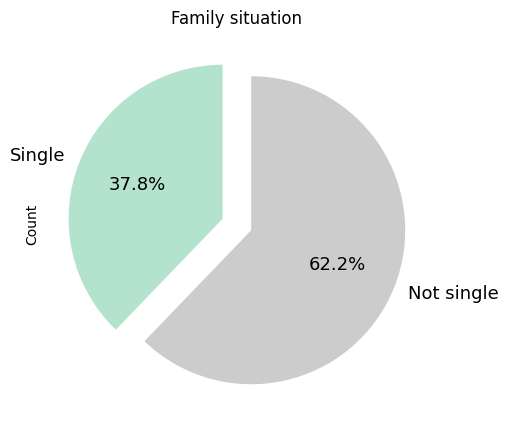

In [18]:
df_family_filtered = df_family[:-1]  #Removes the Total row

kwargs = dict(
    startangle = 90,
    colormap   = 'Pastel2',
    fontsize   = 13,
    explode    = (0.1, 0.1),
    figsize    = (6, 5), 
    autopct    = '%1.1f%%',
    title      = 'Family situation'
)

df_family_filtered['Count'].plot.pie(**kwargs)

In [24]:
df_salary=pd.crosstab(df['salary'], 'Count')
df_salary

bins = [1500, 2500, 3500, 4500, 5500, 6278]
df['salary_class'] = pd.cut(df['salary'], bins = bins)

In [26]:
df_salary = pd.crosstab(df['salary_class'], 'Count')
df_salary.columns.name = ''
n = df_salary['Count'].sum()
df_salary['%'] = df_salary / n * 100
df_salary.loc['Total'] = df_salary[['Count', '%']].sum()
df_salary['Count'] = df_salary['Count'].astype(int)
df_salary.round(decimals=1)

,Count,%
salary_class,,
"(1500, 2500]",47,57.3
"(2500, 3500]",26,31.7
"(3500, 4500]",5,6.1
"(4500, 5500]",3,3.7
"(5500, 6278]",1,1.2
Total,82,100.0


Text(0, 0.5, 'Count, n=82')

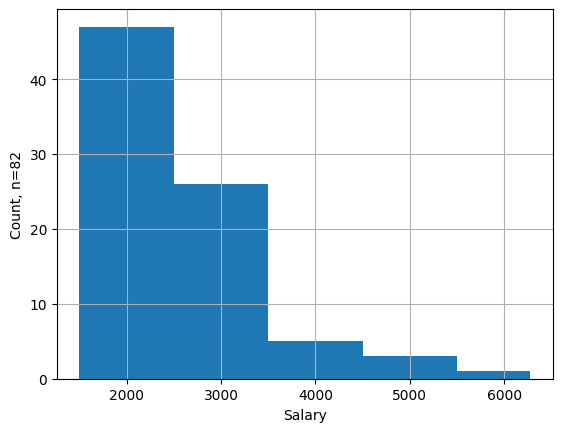

In [25]:
bins = [1500, 2500, 3500, 4500, 5500, 6278]
df['salary'].hist(bins = bins)

plt.xlabel('Salary')
plt.ylabel('Count, n=' + str(n))

In [30]:
df4 = pd.crosstab(df['age_class'], df['sat_salary'])
#df4.index = ['Primary school', 'Vocational school or similar', 'Secondary school graduate', 'Applied science university', 'Other university']
#df4.columns = ['woman', 'man']
df4

sat_salary,1,2,3,4,5
gender,,,,,
1,32,12,12,7,0
2,1,7,7,3,1


In [31]:
df4 = pd.crosstab(df['gender'], df['sat_management']) 
#df4.index = ['Primary school', 'Vocational school or similar', 'Secondary school graduate', 'Applied science university', 'Other university']
#df4.columns = ['woman', 'man']
df4

sat_management,1,2,3,4,5
gender,,,,,
1,7,15,23,15,3
2,0,1,7,8,3
